In [2]:
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Simple Linear Regression

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

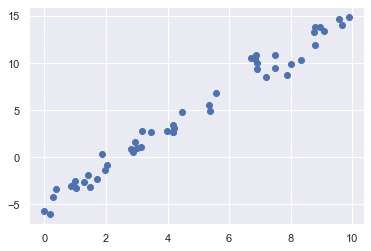

In [3]:
# if same random state is used output same results
rng = np.random.RandomState(1)
#   0-1

#rand -> 50 numbers
x = 10 * rng.rand(50)

#rand from standard normal distribution
#adding noise to data 
y = 2 * x - 5 + rng.randn(50)

plt.scatter(x, y);

We can use Scikit-Learn's LinearRegression estimator to fit this data and construct the best-fit line:


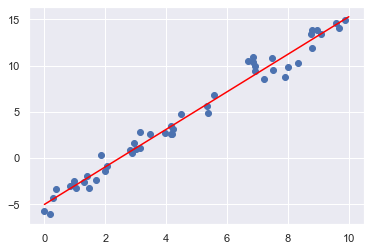

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# np.newaxis  -> (50,1) creates shape
model.fit(x[:, np.newaxis], y)

#generate new data
xfit = np.linspace(0, 10, 1000)

#give xfit as x
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)

#plot ->connect
plt.plot(xfit, yfit,color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


We see that the results are very close to the inputs, as we might hope.

The LinearRegression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [6]:
rng = np.random.RandomState(45)

# 100 numbers and 3 columns
X = 10 * rng.rand(100, 3)

# multiply the factors - Dot product of two arrays.
y = 0.5 + np.dot(X, [1.5, -2., 1.])

# x(100,3) and y(prediction) ->(100,1)
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000044
[ 1.5 -2.   1. ]



Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single LinearRegression estimator to fit lines, planes, or hyperplanes to our data. It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.



# Basis Function Regression
One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions. We have seen one version of this before, in the PolynomialRegression pipeline used in Hyperparameters and Model Validation and Feature Engineering. The idea is to take our multidimensional linear model:$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$. That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$Notice that this is still a linear model—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other. What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.


# Polynomial basis functions
This polynomial projection is useful enough that it is built into Scikit-Learn, using the PolynomialFeatures transformer:

In [7]:
#nonlinear -> polynomial

from sklearn.preprocessing import PolynomialFeatures

x = np.array([2, 3, 4])

# 3->how many polynomial degree/if bias(c)=true it will take one element from above array as bias
poly = PolynomialFeatures(3, include_bias=False)

poly.fit_transform(x[:, None])  #think no y

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value. This new, higher-dimensional data representation can then be plugged into a linear regression.

As we saw in Feature Engineering, the cleanest way to accomplish this is to use a pipeline. Let's make a 7th-degree polynomial model in this way:

In [8]:
#pipeline the poly and linear

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),  #polynomial degree = 7  ->x^7
                           LinearRegression())


With this transform in place, we can use the linear model to fit much more complicated relationships between $x$ and $y$. For example, here is a sine wave with noise:

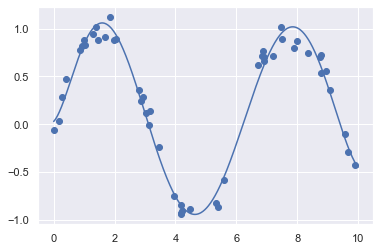

In [9]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)

#based on sin function & also add 10 percent noise
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

******************************************************************************************************

**************************************************************************************************************************

In [10]:
# conventional way to import pandas
import pandas as pd

In [18]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('Advertising.csv', index_col=0)   #index_col=0 -> removes index or else we have to manually delete unwanted

# display the first 5 rows
data.head()

# check the shape of the DataFrame (rows, columns)
data.shape


(200, 4)

What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
Radio: advertising dollars spent on Radio
Newspaper: advertising dollars spent on Newspaper
What is the response?

Sales: sales of a single product in a given market (in thousands of items)
What else do we know?

Because the response variable is continuous, this is a regression problem.
There are 200 observations (represented by the rows), and each observation is a single market.

# Visualizing data using seaborn
Seaborn: Python library for statistical data visualization built on top of Matplotlib

In [14]:

# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

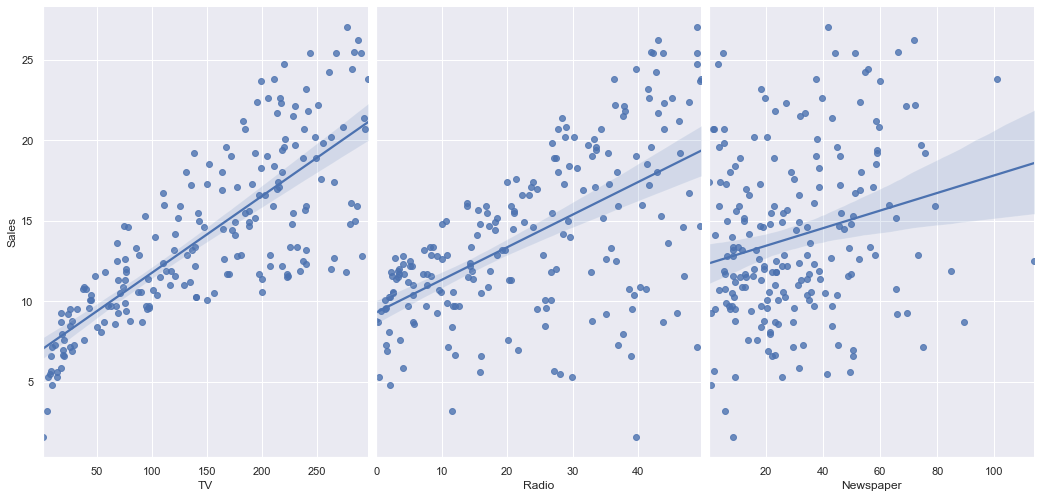

In [21]:
# visualize the relationship between the features and the response using scatterplots

#each feature vs target can be plotted
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

Linear regression
Pros: fast, no tuning required, highly interpretable, well-understood

Cons: unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

Preparing X and y using pandas
scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
However, pandas is built on top of NumPy.
Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [23]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [24]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [27]:
# check the type and shape of y
print(type(y))
print(y.shape)  #(200,1)

<class 'pandas.core.series.Series'>
(200,)


# Splitting X and y into training and testing sets¶


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [29]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


# Linear regression in scikit-learn

In [30]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

Interpreting model coefficients¶


In [31]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [32]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$
How do we interpret the TV coefficient (0.0466)?

For a given amount of Radio and Newspaper ad spending, a "unit" increase in TV ad spending is associated with a 0.0466 "unit" increase in Sales.
Or more clearly: For a given amount of Radio and Newspaper ad spending, an additional $1,000 spent on TV ads is associated with an increase in sales of 46.6 items.
Important notes:

This is a statement of association, not causation.
If an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.
Making predictions

In [33]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an evaluation metric in order to compare our predictions with the actual values!

# Model evaluation metrics for regression
Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate three common evaluation metrics for regression problems:

In [34]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [35]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [36]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [37]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

# Computing the RMSE for our Sales predictions


In [38]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.404651423032895


# Feature selection
Does Newspaper "belong" in our model? In other words, does it improve the quality of our predictions?

Let's remove it from the model and check the RMSE!

In [39]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


The RMSE decreased when we removed Newspaper from the model. (Error is something we want to minimize, so a lower number for RMSE is better.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.